In [2]:
!apt-get update
!apt install -y chromium-chromedriver
%pip install requests beautifulsoup4 selenium textblob vaderSentiment matplotlib seaborn nltk
%pip install transformers
%pip install datasets
%pip install -q google-colab-selenium
%pip install ipywidgets jupyter nbextension enable --py widgetsnbextension --sys-prefix

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,946 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import regex as re
import string
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from matplotlib import pyplot as plt
import torch
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

import google_colab_selenium as gs
from selenium.webdriver.common.by import By
from selenium import webdriver

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# SENTIMENT ANALYSIS:

## DATA EXTRACTION: Retrieving comments from webtoon *Lore Olympus* ! 🌐

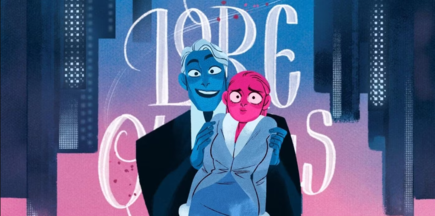

For this project we will work with the comments section on the 1st chapter of Lore Olympus that we can find on the official website 'Webtoon.com'.

*Lore Olympus is actually the first Webtoon that made me buy fast pass on the app*

### Setting the driver & loading the comments :



In [4]:
driver = gs.Chrome()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
def retrieve_comments_from_webtoon(np, url):
  """
  np: integer : number of pages to look at in order to retrieve comments from these pages.
  url : url used for your webtoon
  """
  comments_data = []
  comments_info = str()

  try:
      for i in range(1, np + 1):
          # Regex to change the episode number in rhe url
          episode_url = re.sub(r"(episode-)(\d+)|(episode_no=)(\d+)", lambda match: f"{match.group(1) or match.group(3)}{i}", url)
          print(f"Access to EP no.{i} : {episode_url}")

          # Website access
          driver.get(episode_url)
          time.sleep(1)

          # Click on "More" button to access as much comments as possible
          while True:
              try:
                  load_more_button = driver.find_element(By.CLASS_NAME,"wcc_CommentMore__more")
                  load_more_button.click()
                  print("Loading more comments !")
                  time.sleep(1)  # Waiting for more comments
              except Exception:
                  print("No 'More' button left or error !")
                  break

          # Retrieve comments
          try:
            comment_elements = driver.find_elements(By.CLASS_NAME, "wcc_CommentList__list")
            if len(comment_elements)>0:
              comments_info = comments_info + comment_elements[0].text
              print("Comment(s) loaded.")
            else:
              print("There's no comment(s) to load !")
          except Exception as e:
              print(f"An error occure during the comments extraction for episode no.{i}: {e}")

  finally:
      driver.quit()

  return comments_info

In [6]:
url = "https://www.webtoons.com/en/romance/lore-olympus/episode-1/viewer?title_no=1320&episode_no=1"
comments = retrieve_comments_from_webtoon(1,url)

Access to EP no.1 : https://www.webtoons.com/en/romance/lore-olympus/episode-1/viewer?title_no=1320&episode_no=1
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !
Loading more comments !

### Data cleaning:

In [7]:
# Removing what we don't need
data = comments.replace('\nTOP','')
data=data.replace('\n',' ')
data=data.replace("\'","")
data

'셀 Mar 04, 2018 EYYY ANYONE HERE FROM DISCOVER??? I LOVE THIS SM HOPE YOU NEWCOMERS ENJOY!! Replies 98 57802 909 Maddie1137 Mar 04, 2018 The art style is mesmerizing! Cant wait to see where this goes, this myth has always fascinated me~ [+please like the chapters to support the author/boost it in the charts!] Replies 27 54610 679 Amalia Herrera Mar 04, 2018 Im from discover too.EDIT: I cant believe I got top comment this has never happened to me. So I guess id just like to say thank you for liking my comment. I love this myth and I cant wait to see the authors interpretation of this story come about😀💖🖤 Replies 17 31111 1270 justatinydepresso Mar 04, 2018 HEY YEAH HI IM A GREEK NERD AND I LOVE THIS MORE THAN ZEUS LIKES TO FUCK EVERYTHING THAT MOVES KTHNXSBAI Replies 33 1871 25 Mikan200 Mar 04, 2018 Hades phone: Apple=Pomegranate lol Replies 9 968 6 Anna Rukat Jul 01, 2018 this satisfies my inner mythology nerd in a strange way. here, have some trivia: Minthe was a naiad, a kind of nymph

In [8]:
# Catching informations we want
pattern = re.compile(r'(\w{3} \d{2}, \d{4}) (.*?) (Replies \d+|Reply\s?) (\d+) (\d+) ', re.DOTALL)
matches = pattern.findall(data)

In [9]:
formated_list= list()
comments_only= list()
for match in matches:
    date, comment, replies, like, dislike = match
    formated_list.append({
        'Date': date,
        'Comment': comment.strip(),
        'Likes': int(like),
        'Dislikes': int(dislike)
    })
    comments_only.append({
        'Comment': comment.strip()
    })

In [10]:
#Saving data into csv files
df=pd.DataFrame(formated_list)
comments_only_df=pd.DataFrame(comments_only)
df.to_csv('Lore_Olympus_comments.csv', index=False,encoding="utf-8-sig")
#comments_only_df.to_csv('Lore_Olympus_comments_only.csv', index=False,encoding="utf-8-sig")

In [11]:
df.head()

,Date,Comment,Likes,Dislikes
0,"Mar 04, 2018",EYYY ANYONE HERE FROM DISCOVER??? I LOVE THIS ...,57802,909
1,"Mar 04, 2018",The art style is mesmerizing! Cant wait to see...,54610,679
2,"Mar 04, 2018",Im from discover too.EDIT: I cant believe I go...,31111,1270
3,"Mar 04, 2018",HEY YEAH HI IM A GREEK NERD AND I LOVE THIS MO...,1871,25
4,"Mar 04, 2018",Hades phone: Apple=Pomegranate lol,968,6


## QUICK EDA  📊:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6601 non-null   object
 1   Comment   6601 non-null   object
 2   Likes     6601 non-null   int64 
 3   Dislikes  6601 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 206.4+ KB


**Like and Dislike distribution:**

,Likes,Dislikes
count,6601.000000,6601.000000
mean,24.526284,1.186638
std,1051.196780,21.473642
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.000000
max,57802.000000,1270.000000


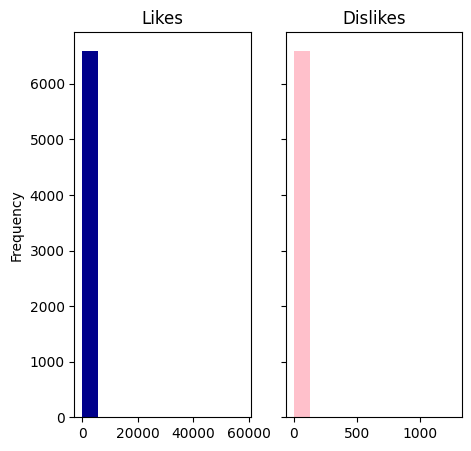

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(5,5), sharey=True)

df["Likes"].plot(kind='hist',color='darkblue', ax=axes[0])
axes[0].set_title("Likes")

df["Dislikes"].plot(kind='hist',color='pink', ax=axes[1])
axes[1].set_title("Dislikes")

df[['Likes','Dislikes']].describe()

**Lenght and word count of comments distributions:**

,Comment
count,6601.000000
mean,76.271928
std,69.325072
min,1.000000
25%,32.000000
50%,58.000000
75%,96.000000
max,505.000000


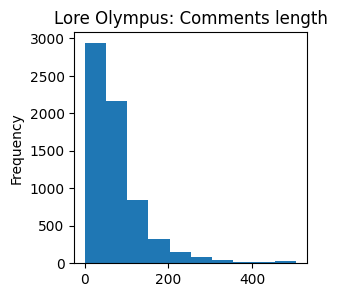

In [14]:
df['Comment'].str.len().plot(kind='hist', title='Lore Olympus: Comments length', figsize=(3,3))
df['Comment'].str.len().describe()

,Comment
count,6601.000000
mean,14.619452
std,13.193249
min,1.000000
25%,6.000000
50%,11.000000
75%,18.000000
max,101.000000


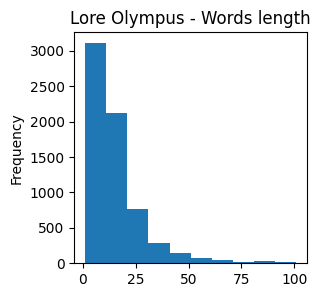

In [15]:
df['Comment'].str.split().apply(len).plot(kind='hist', title='Lore Olympus - Words length', figsize=(3,3))
df['Comment'].str.split().apply(len).describe()

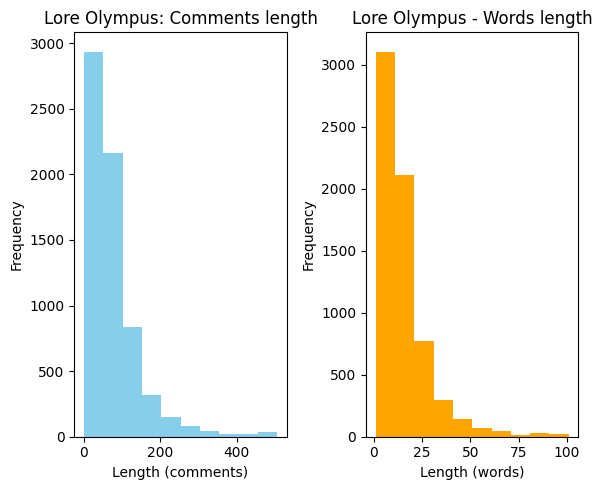

Statistics for Lore Olympus: Comments length:
 count    6601.000000
mean       76.271928
std        69.325072
min         1.000000
25%        32.000000
50%        58.000000
75%        96.000000
max       505.000000
Name: Comment, dtype: float64

Statistics for Lore Olympus - Words length:
 count    6601.000000
mean       14.619452
std        13.193249
min         1.000000
25%         6.000000
50%        11.000000
75%        18.000000
max       101.000000
Name: Comment, dtype: float64


In [16]:
import matplotlib.pyplot as plt

# Creating a figure with 2 subplots aligned on on row
fig, axes = plt.subplots(1, 2, figsize=(6,5))

# Comments length histogram
df['Comment'].str.len().plot(
    kind='hist',
    title='Lore Olympus: Comments length',
    color='skyblue',
    ax=axes[0]
)
axes[0].set_xlabel('Length (comments)')
axes[0].set_ylabel('Frequency')

# Words length histogram
df['Comment'].str.split().apply(len).plot(
    kind='hist',
    title='Lore Olympus - Words length',
    color='orange',
    ax=axes[1]
)

axes[1].set_xlabel('Length (words)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

comment_length_stats = df['Comment'].str.len().describe()
word_length_stats = df['Comment'].str.split().apply(len).describe()

print("Statistics for Lore Olympus: Comments length:\n", comment_length_stats)
print("\nStatistics for Lore Olympus - Words length:\n", word_length_stats)

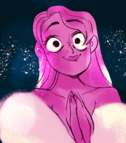

Now we got something cleaner to work with !

## DATA PRE-PROCESSING ⚙️ : Preparing our data for sentiment analysis

In [17]:
df.head(3)

,Date,Comment,Likes,Dislikes
0,"Mar 04, 2018",EYYY ANYONE HERE FROM DISCOVER??? I LOVE THIS ...,57802,909
1,"Mar 04, 2018",The art style is mesmerizing! Cant wait to see...,54610,679
2,"Mar 04, 2018",Im from discover too.EDIT: I cant believe I go...,31111,1270


In [18]:
def remove_punctuation(text):
  """
   Remove punctuation from text
  """
  translation_table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
  cleaned_text = text.translate(translation_table)
  punctuationfree = ' '.join(cleaned_text.split())
  return punctuationfree

def remove_emojis(text):
  """
  Regular expression to match emojis
  """
  emoji_pattern = re.compile(
      "["
      "\U0001F600-\U0001F64F"  # Emoticons
      "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
      "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
      "\U0001F700-\U0001F77F"  # Alchemical Symbols
      "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
      "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
      "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
      "\U0001FA00-\U0001FAFF"  # Chess Symbols
      "\U00002702-\U000027B0"  # Miscellaneous Symbols
      "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
      "]+",
      flags=re.UNICODE
  )
  return emoji_pattern.sub(r'', text)

In [19]:
def data_processing_pipeline(df):
  # remove punctuation & emojis
  df['Clean_comment'] = df['Comment'].apply(lambda x:remove_emojis(remove_punctuation(x)))

data_processing_pipeline(df)
df.head(3)

,Date,Comment,Likes,Dislikes,Clean_comment
0,"Mar 04, 2018",EYYY ANYONE HERE FROM DISCOVER??? I LOVE THIS ...,57802,909,EYYY ANYONE HERE FROM DISCOVER I LOVE THIS SM ...
1,"Mar 04, 2018",The art style is mesmerizing! Cant wait to see...,54610,679,The art style is mesmerizing Cant wait to see ...
2,"Mar 04, 2018",Im from discover too.EDIT: I cant believe I go...,31111,1270,Im from discover too EDIT I cant believe I got...


Checking for NaN values because some comments are only composed of emojis or punctuations, for instance we'll just drop those rows.

In [20]:
df[df["Clean_comment"].isna()].head(8)

,Date,Comment,Likes,Dislikes,Clean_comment


In [21]:
df = df[df['Clean_comment'].notna()]

In [22]:
df.to_csv('Lore_Olympus_comments.csv', index=False,encoding="utf-8-sig")

## BERT PRE-TRAINED MODEL 🧠:

**(a) BERT Pre-trained model:**

In [23]:
from transformers import BertModel,BertTokenizer, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification

In [24]:
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
#model = BertModel.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english", torch_dtype=torch.float16, attn_implementation="sdpa")
model = BertForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [25]:
tokens = tokenizer.encode("I love it, it's wonderful !", return_tensors="pt")
results = model(tokens)
results

SequenceClassifierOutput(loss=None, logits=tensor([[-2.6333, -2.8985, -0.9619,  1.6933,  3.9106]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [26]:
int(torch.argmax(results.logits))

4

In [27]:
def sentiment_score(comment):
  if comment != np.nan:
    tokens = tokenizer.encode(comment, return_tensors="pt")
    results = model(tokens)
    score = int(torch.argmax(results.logits))+1
    probabilities = torch.nn.functional.softmax(results.logits, dim=1)
    p = max(probabilities.squeeze().tolist())
  else:
    score=np.nan
    p=np.nan
  return score, p

In [28]:
sentiment_score(df["Comment"].iloc[2])

(5, 0.3809964656829834)

In [29]:
model.eval() # Model layers

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [30]:
df.head(2)

,Date,Comment,Likes,Dislikes,Clean_comment
0,"Mar 04, 2018",EYYY ANYONE HERE FROM DISCOVER??? I LOVE THIS ...,57802,909,EYYY ANYONE HERE FROM DISCOVER I LOVE THIS SM ...
1,"Mar 04, 2018",The art style is mesmerizing! Cant wait to see...,54610,679,The art style is mesmerizing Cant wait to see ...


In [31]:
df[["Sentiment score","Probability"]]=df["Clean_comment"].apply(lambda x: pd.Series(sentiment_score(x)))

**B) Results:**

In [32]:
df.head(2)

,Date,Comment,Likes,Dislikes,Clean_comment,Sentiment score,Probability
0,"Mar 04, 2018",EYYY ANYONE HERE FROM DISCOVER??? I LOVE THIS ...,57802,909,EYYY ANYONE HERE FROM DISCOVER I LOVE THIS SM ...,5.0,0.855882
1,"Mar 04, 2018",The art style is mesmerizing! Cant wait to see...,54610,679,The art style is mesmerizing Cant wait to see ...,5.0,0.487033


In [33]:
df["Sentiment score"].value_counts()

,count
Sentiment score,
5.0,3339
1.0,1494
3.0,872
4.0,586
2.0,310


**1 star:** Very negative sentiment.

**2 stars:** Negative sentiment.

**3 stars:** Neutral sentiment.

**4 stars:** Positive sentiment.

**5 stars:** Very positive sentiment.

In [34]:
df.to_csv('Lore_Olympus_annoted2.csv', index=False,encoding="utf-8-sig") # Will be used later in the game

## INSIGHTS pt.1 📶:

**(a) General statistics: Distribution of sentiments score:**

In [35]:
fig = px.histogram(df, x='Sentiment score', title='1. Sentiment score distribution', color='Sentiment score')
fig.update_layout(width=450,height=350)
fig.show()

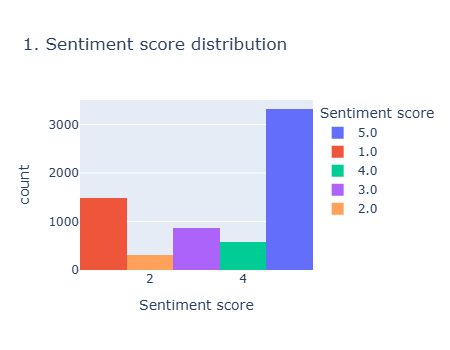

In [36]:
df["Sentiment score"].value_counts()

,count
Sentiment score,
5.0,3339
1.0,1494
3.0,872
4.0,586
2.0,310


==> Globally the readers positively welcomed the chapters with 60 % of strictly positive comments (Sentiment score = 5 or 4). If we add the neutral comments we reach 72%.

**(b) Like/dislike distribution through sentiment scores:**

In [37]:
unique_score = sorted(df['Sentiment score'].unique())

fig = make_subplots(
    rows=2, cols=len(unique_score),
    shared_yaxes=True,
    subplot_titles=[f'Score = {score}' for score in unique_score]
)

for i, score in enumerate(unique_score):
    subset = df[df['Sentiment score'] == score]
    fig.add_trace(
        go.Histogram(
            x=subset['Dislikes'],
            nbinsx=20,
            marker=dict(color='purple'),
            showlegend=False),
    row=2, col=i+1)

for i, score in enumerate(unique_score):
    subset = df[df['Sentiment score'] == score]
    fig.add_trace(
        go.Histogram(
            x=subset['Likes'],
            nbinsx=20,
            marker=dict(color='blue'),
            showlegend=False),
    row=1, col=i+1)

fig.add_annotation(
    text="Likes",
    xref="paper", yref="paper",
    x=0.5, y=0.5,
    showarrow=False,
    font=dict(size=16, color="blue")
)

fig.add_annotation(
    text="Dislikes",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,
    showarrow=False,
    font=dict(size=16, color="purple")
)

fig.update_layout(
    height=450,
    width=len(unique_score) * 250,
    title_text='2. Likes & Dislikes / Sentiment Score:',
    yaxis_title='Count')

fig.show()

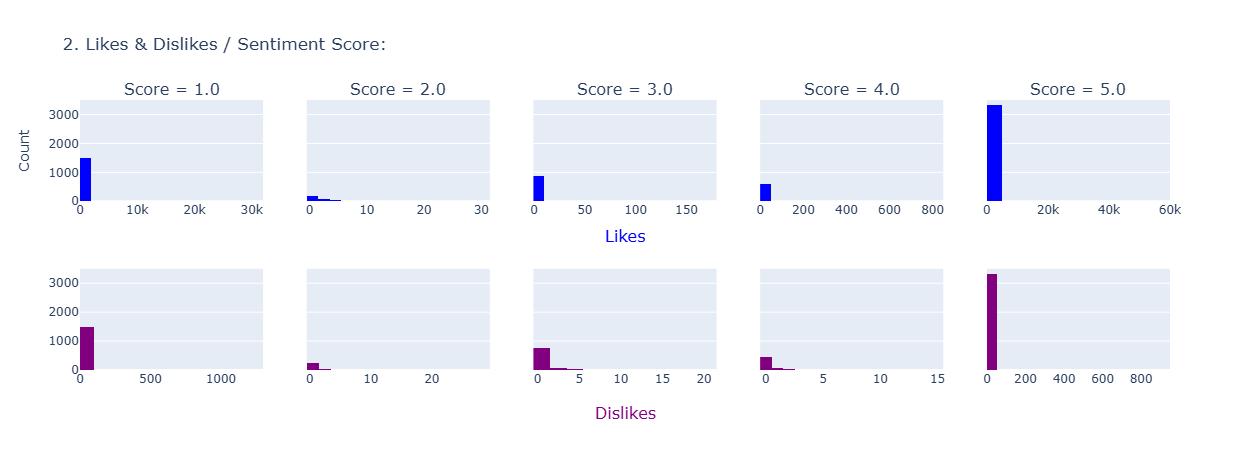

In [38]:
df[df['Sentiment score']==5][['Likes','Dislikes']].sum(), df[df['Sentiment score']==1][['Likes','Dislikes']].sum()

(Likes       122799
 Dislikes      3737
 dtype: int64,
 Likes       34767
 Dislikes     2878
 dtype: int64)

In [39]:
df[df['Sentiment score']==2][['Likes','Dislikes']].sum(), df[df['Sentiment score']==3][['Likes','Dislikes']].sum(), df[df['Sentiment score']==4][['Likes','Dislikes']].sum()

(Likes       699
 Dislikes    370
 dtype: int64,
 Likes       1840
 Dislikes     589
 dtype: int64,
 Likes       1793
 Dislikes     259
 dtype: int64)

1. **Very polarized comments got much more interactions from readers:**
* 5 ⭐ (Very Positive) comments got > 122k likes ❤️ which represents ~76% of all the Likes interactions and < 4k dislikes 👎🏾 which is ~48% of all the Dislikes interactions.

* 1 ⭐ (Very Negative) comments got > 34.7k likes ❤️ which represents ~21,5% of all the Likes interactions and < 2k dislikes 👎🏾 which represents ~36% of all the Dislikes interactions .


## *IMPROVEMENTS: 2 strategies + insights pt.2* ⛹



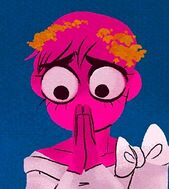

1. **STRATEGY 1**: Adding an Emotion analyzer to clarify ambigous sentiment and get better insights.

In [40]:
from transformers import pipeline

In [41]:
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [42]:
emotion_analyzer(df['Comment'].iloc[10]), df['Comment'].iloc[10]

([{'label': 'disgust', 'score': 0.8955783843994141}],
 'That moment when you kiss your sister in front of your brothers')

In [43]:
for i in range(len(df)):
  try:
    df.loc[i,"Emotions"]=emotion_analyzer(df['Comment'].iloc[i])[0]['label']
  except Exception as e:
    print(f"An error occur with the process of comment no.{i} (The original comment maybe only contains emojis and or punctuation !): \n {df['Comment'].iloc[i]}")
    df.loc[i,"Emotions"]=np.nan

Token indices sequence length is longer than the specified maximum sequence length for this model (628 > 512). Running this sequence through the model will result in indexing errors


An error occur with the process of comment no.4432 (The original comment maybe only contains emojis and or punctuation !): 
 siznnn .b, as mnnm 〜(꒪꒳꒪)〜ヽ(*ﾟｰヽ(*ﾟｰﾟ*)ﾉヽ(*ﾟｰﾟ*)ﾉ(~‾▿‾)~(~‾▿‾)~(~‾▿‾)~(~‾▿‾)~(~‾▿‾)~(~‾▿‾)~(~‾▿‾)~(~‾▿‾)~〜(꒪꒳꒪)〜〜(꒪꒳꒪)〜┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツ)┬──┬ ¯\_(ツﾟ*)〜(꒪꒳꒪)〜〜(꒪꒳꒪)〜〜(꒪꒳꒪)〜＼(ﾟｰ〜(꒪꒳꒪)〜(~‾▿‾)~(~‾▿‾)~ﾟ＼)〜(꒪꒳꒪)〜〜(~‾▿‾)~〜(꒪꒳꒪)〜꒪)〜〜(꒪꒳꒪)〜(ノ^_^)ノ〜(꒪꒳꒪)〜ヘ(￣ω￣ヘ(~‾▿‾)~＼(ﾟｰﾟ＼)(ノ^_^)ノヾ(･ω･*)ﾉヾ(･ω･*)ﾉ (~‾▿‾)~〜(꒪꒳꒪☠️✨ヽ(*ﾟｰﾟ*)ﾉ


In [44]:
df.head()

,Date,Comment,Likes,Dislikes,Clean_comment,Sentiment score,Probability,Emotions
0,"Mar 04, 2018",EYYY ANYONE HERE FROM DISCOVER??? I LOVE THIS ...,57802,909,EYYY ANYONE HERE FROM DISCOVER I LOVE THIS SM ...,5.0,0.855882,neutral
1,"Mar 04, 2018",The art style is mesmerizing! Cant wait to see...,54610,679,The art style is mesmerizing Cant wait to see ...,5.0,0.487033,joy
2,"Mar 04, 2018",Im from discover too.EDIT: I cant believe I go...,31111,1270,Im from discover too EDIT I cant believe I got...,1.0,0.343923,surprise
3,"Mar 04, 2018",HEY YEAH HI IM A GREEK NERD AND I LOVE THIS MO...,1871,25,HEY YEAH HI IM A GREEK NERD AND I LOVE THIS MO...,5.0,0.727946,anger
4,"Mar 04, 2018",Hades phone: Apple=Pomegranate lol,968,6,Hades phone Apple Pomegranate lol,5.0,0.294891,neutral


In [45]:
df["Emotions"].value_counts()

,count
Emotions,
neutral,2048
joy,1939
surprise,1729
sadness,398
anger,220
disgust,189
fear,77


In [46]:
df["Emotions"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6601 entries, 0 to 6600
Series name: Emotions
Non-Null Count  Dtype 
--------------  ----- 
6600 non-null   object
dtypes: object(1)
memory usage: 51.7+ KB


**(a) Emotions Analysis:**

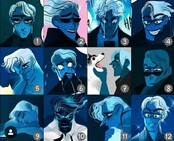

In [47]:
fig = px.histogram(
    df,
    x="Emotions",
    color="Sentiment score",
    labels={"Emotions": "Emotions", "Sentiment score": "Sentiment scores"},
    barmode="group",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    height=500,
    width=800,
    xaxis_title="Emotions",
    legend_title="Sentiment scores",
    title_font_size=16,
    legend_font_size=12
)
fig.show()

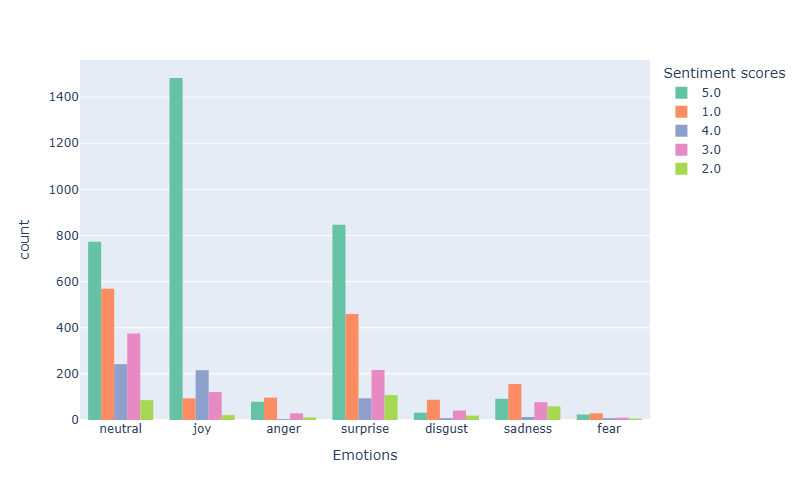

In [48]:
df[(df['Sentiment score'] == 5) | (df['Sentiment score'] == 4) ]["Emotions"].value_counts().head(4)

,count
Emotions,
joy,1702
neutral,1018
surprise,944
sadness,105


* **Top 3 emotions (5 + 4 ⭐  score):** Joy > (Neutral) > Surprise > Sadness:

 --> Indeed readers were happy to finally see this webtoon on the application

 --> Readers were surprised to see Lore Olympus becoming on official "Originals" after reading it on Webtoon Discover or Tumblr.

In [49]:
df[(df['Sentiment score'] == 1) | (df['Sentiment score'] == 2) ]["Emotions"].value_counts().head(4)

,count
Emotions,
neutral,654
surprise,568
sadness,215
joy,116


In [50]:
df[(df['Sentiment score'] == 1) & (df["Emotions"] =="surprise") | (df['Sentiment score'] == 2) & (df["Emotions"] =="surprise")][90:].head()

,Date,Comment,Likes,Dislikes,Clean_comment,Sentiment score,Probability,Emotions
837,"Jul 22, 2022",anyone here rereading?,4,0,anyone here rereading,1.0,0.701378,surprise
855,"Mar 16, 2022",Bruh i hate minthy alrdy just me?,1,4,Bruh i hate minthy alrdy just me,1.0,0.479093,surprise
865,"Dec 17, 2021",this is my fourth time rereading ….,4,0,this is my fourth time rereading …,1.0,0.408956,surprise
871,"Nov 17, 2021","Jesus Christ,the art style changed so much",1,4,Jesus Christ the art style changed so much,2.0,0.306492,surprise
881,"Jul 26, 2021",Why are they all hot,4,0,Why are they all hot,1.0,0.342919,surprise


* **Top 3 emotions (1 + 2 ⭐ score):** (Neutral) > Surprise > Sadness > Joy:

 --> After looking into comments classified as 1 or 2 with one of this emotions, we can make the hypothesis that most of them could have been classified as "3 stars - Neutral" and not negative/very negative. This indicate that the model did not catch certain particularities in the comment, we may improve the model performances or try another model with better performances.

In [51]:
df[df['Sentiment score'] == 3]["Emotions"].value_counts().head(4)

,count
Emotions,
neutral,376
surprise,217
joy,121
sadness,78


* **Top 3 emotions (3 ⭐ score ):** (Neutral) > Surprise > Joy > Sadness:

 --> Readers are surprised and express joy in many neutral comments.


**Globally, we can see that readers are positively surprised.**

**(b) Wordcloud Analysis: In-depth insights:**

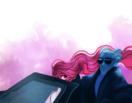

In [52]:
from wordcloud import WordCloud
from PIL import Image

def get_wordcloud(column):
  text = ' '.join(column.dropna())
  wordcloud = WordCloud(width=350, height=250, background_color='white', colormap='viridis').generate(text)
  return wordcloud

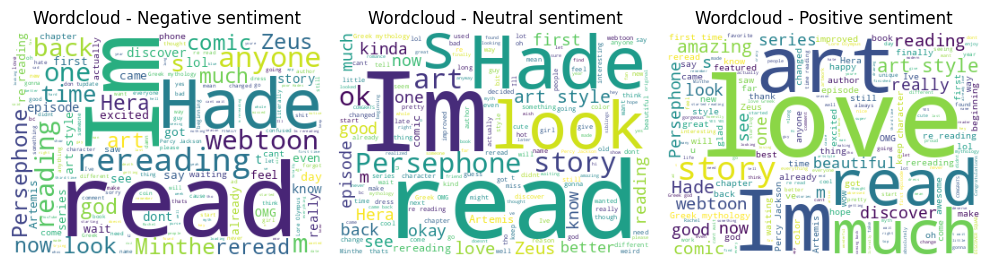

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Wordcloud for Sentiment scores 1 + 2
sub_df2 = df[(df['Sentiment score'] == 1) | (df['Sentiment score'] == 2)]
wordcloud2 = get_wordcloud(sub_df2["Comment"])
axes[0].imshow(wordcloud2)
axes[0].axis('off')
axes[0].set_title("Wordcloud - Negative sentiment")

# Wordcloud for Sentiment score 3
sub_df4 = df[df['Sentiment score'] == 3]
wordcloud4 = get_wordcloud(sub_df4["Comment"])
axes[1].imshow(wordcloud4)
axes[1].axis('off')
axes[1].set_title("Wordcloud - Neutral sentiment")

# Wordcloud for Sentiment scores 4 + 5
sub_df3 = df[(df['Sentiment score'] == 5) | (df['Sentiment score'] == 4)]
wordcloud3 = get_wordcloud(sub_df3["Comment"])
axes[2].imshow(wordcloud3)
axes[2].axis('off')
axes[2].set_title("Wordcloud - Positive sentiment")

plt.tight_layout()
plt.show()

* **Wordcloud ⭐+⭐⭐:** Interesting points turns around words like Read, Hades, Minthe, Comic, Discover.

This fits with the scenes that take place in the chapter, as we can see Hades and Minthe interacting together in a toxic way that can induce these negative comments from readers. Regarding words like read/reread/reading/rereading, comic, and discover, most readers express that they are coming from Webtoon Discover, which was created by the platform to develop the webtoon market as a self-publishing platform for artists to self-publish their comics.

* **Wordcloud ⭐⭐⭐⭐+⭐⭐⭐⭐⭐:** Interesting points turns around words like Love, Read, Art Style, Story, Amazing.

The Art style made a strong impression.


* **Wordcloud ⭐⭐⭐:** Interesting points turns around words like Hades, Read, Look, Story, Art Style.

Most of the Neutral comments turn around these words, moreover we notice comments that talk about the story, the art style and Hades, with this insights we can't say if it is with positive or negative emotion. To do so we can have a look on another wordcloud containing those words:

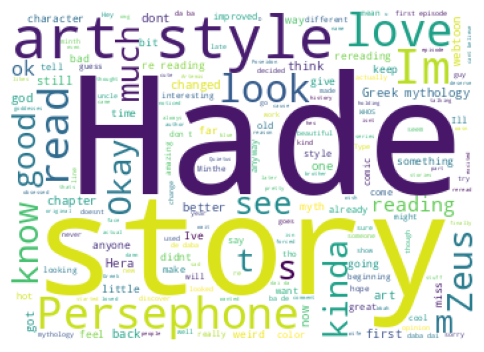

In [54]:
# Neutral comments in-depth wordcloud
mask = sub_df4["Comment"].str.contains("story|art style|hades", case=False, na=False)
sb = sub_df4[mask].reset_index(drop=True)
wordcloud = get_wordcloud(sb["Comment"])
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This wordcloud provides a deeper understanding of the neutral comments and reveals a strong focus on the 'art style' and 'story,' with diverse **positive remarks** reflected in words like 'love, 'beautiful,' and 'improved,' alongside more critical terms such as 'bad', 'look' and 'different'. Words like 'Hades' and 'Persephone' emphasize the characters’ **central role in the narrative**, while terms such as 'changed,' 'first,' and 'interesting' suggest a **mix of personal impressions and evolving perspectives**. This visualization captures the range of emotions and opinions, offering a well-rounded view of reader engagement.


**(c) Trend Analysis:**

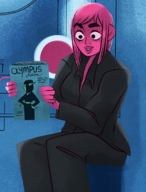



In [55]:
df["Date"] = pd.to_datetime(df["Date"], format="%b %d, %Y")
df = df.sort_values(by="Date")

# Grouping sentiment scores / month to smooth the trend
df_sentiment = df.resample("ME", on="Date")["Sentiment score"].mean().round(1).reset_index()


df_emotions = df.groupby([pd.Grouper(key="Date", freq="QE"), "Emotions"]).size().reset_index(name="Count")

# Sentiment Score evolution
fig1 = px.line(df_sentiment, x="Date", y="Sentiment score",
               markers=True,
               title="Sentiment score mean evolution through time",
               labels={"Sentiment score": "Sentiment score Mean", "Date": "Time"},
               line_shape="spline")

fig1.add_hline(
    y=3,
    annotation_text="Threshold = 3.0",
    line=dict(color="red",width=1)
    )

fig1.update_traces(line=dict(color="royalblue", width=3))
fig1.update_layout(
    xaxis=dict(title="Date", tickangle=-45),
    height=300,
    width=1000)


fig1.show()

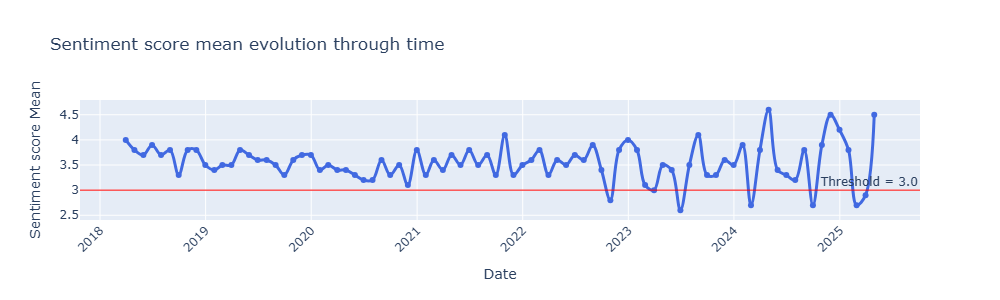

On average, from 2018 to 2025 the scores are rather positive. We notice a fairly homogeneous and positive start but decreasing from 2018 to mid-2020 then slightly more dispersed scores from the end of 2022 which shows that readers react more strongly to the chapter, this corresponds to the period from which Lore Olympus gained its worldwide notoriety. This event can potentially explain the dispersion of opinions in comments.

In [56]:
# Comment Emotions distribution
fig2 = px.line(df_emotions, x="Date", y="Count", color="Emotions",
               markers=True,
               title="Comments emotions evolution through time",
               labels={"Count": "Occurrences", "Date": "Time"},
               line_shape="spline")

fig2.update_layout(
    xaxis=dict(title="Date", tickangle=-45),
    height=350,
    width=1000)
fig2.show()

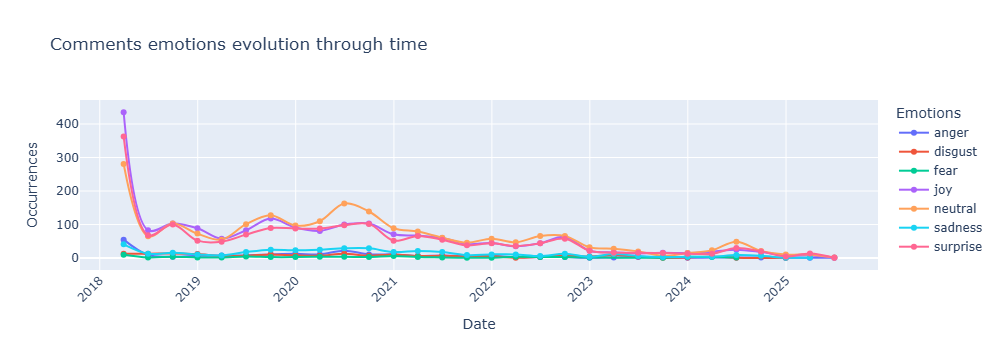

From 2018 to 2023, positive emotions such as joy, surprise and neutrality are strongly dominant, then they are still dominant but significantly less strong.

In [57]:
# Group comments by Year to know how many comments we got through years
df.groupby(pd.Grouper(key="Date", freq="YE"))["Comment"].count()

,Comment
Date,
2018-12-31,2041
2019-12-31,1187
2020-12-31,1407
2021-12-31,778
2022-12-31,610
2023-12-31,244
2024-12-31,281
2025-12-31,53


2. **STRATEGY 2**: Applying BERT model on unpreprocessed textual data, directly on the comments of .the column "*Comment*" As seen previously in the model architecture, there is an embedding layer at the beginning of the neuronal network. We can try to apply

In [ ]:
# TRY DIRECTLY ON COMMENT TO COMPARE IF THERE'S IMPROVEMENT
df[["SS2","P2"]]=df["Comment"].apply(lambda x: pd.Series(sentiment_score(x)))
df.head(3)

In [ ]:
# Display comments where p2<0.5 and p1 >0.5. The model is less confident about these predictions with the 2nd method.
df.loc[(df["P2"] < 0.5) & (df["Probability"] >= 0.5)]